# Imports

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2


pd.set_option('display.max_columns', None)

# Functions

In [391]:
def plot_features(model_dic, name_feat_from):
    
    x = []
    y = []

    for top in list(range(len(model_dic))):
        keys = list(model_dic.keys())
        values = list(model_dic.values())
        x.append(keys[top])
        y.append(values[top])

    plt.figure(figsize=(5, 8))
    sns.barplot(y,x, )
    plt.title(name_feat_from)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.ylabel("Features")
    plt.xlabel("Features Score")
    plt.show()

In [392]:
def plot_feature_importances(model, data_train):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


In [393]:
def feature_importance_graph (model, X, name_model):
    feature_score = list(model.feature_importances_)
    features = list(X.columns)

    featured = {}
    for ind in list(range(len(features))):
        featured[features[ind]] = feature_score[ind]

    feature_imp = dict(sorted(featured.items(), key=lambda x: x[1], reverse=True))

    keys = []
    vals = []
    for key, val in feature_imp.items():
        keys.append(key)
        vals.append(val)

    plt.figure(figsize=(5,25))
    plt.grid('dashed')
    sns.barplot( vals[:50], keys[:50])
    plt.title("Feature Importance (Top 50) with" + str(name_model))
    plt.xticks(rotation=90)
    plt.ylabel("Features")
    plt.xlabel("Feature Scores")
    plt.show()


In [394]:
def confision_matrix(model, df, df_target, target='target_names'):
    predicted = model.predict(df)
    cm = confusion_matrix(df_target, predicted)
    sns.heatmap(cm, annot=True)
    plt.show()

In [395]:
def print_report (ytrain, ytest, ytrain_pred, ytest_pred):
    report = classification_report(ytrain, ytrain_pred)
    print("Train Scores \n" + '-'*50)
    accuracy = accuracy_score(ytrain, ytrain_pred)
    print(f"Train Accuracy: {accuracy}")
    report = classification_report(ytrain, ytrain_pred)
    print("Test Scores \n" + '-'*50)
    accuracy = accuracy_score(ytest, ytest_pred)
    print(f"Test Accuracy: {accuracy}")

    

In [149]:
# def good_vif(data, columns, target='price'):   
#     vifs = {}
#     for col in columns:
#         x = data[col]
#         y = data[target]
#         linereg = sm.OLS(y, x)
#         results= linereg.fit()
#         vif = round(1 / (1 - results.rsquared), 2)
#         if vif <= 3:
#             vifs[col] = vif
#     return vifs

# def high_vif(data, columns, target='price'):   
#     vifs = {}
#     for col in columns:
#         x = data[col]
#         y = data[target]
#         linereg = sm.OLS(y, x)
#         results= linereg.fit()
#         vif = round(1 / (1 - results.rsquared), 2)
#         vifs[col] = vif
#     return vifs

# def added_features(data, features, columns='all'):
#     if columns == 'all':
#         columns = list(data.columns.drop('price'))
#     for col in columns:
#         features.append(col)
#         print(col, "vs price", features[:1])
#         mk_OLS(data, cols=features)
#         features.pop()
        
        
# def OLS_VIF (data, cols= 'all', target='price'):
#     if cols == 'all':    
#         x = data.drop([target], axis=1)
#     else:
#         x = data[cols]
#     y = data[target]
#     linereg = sm.OLS(y, x)
#     results = linereg.fit()
#     display(results.summary())
#     vif = round(1 / (1 - results.rsquared), 2)
#     return vif

# def check_vif(data, columns, target='price'):   
#     x = data[columns]
#     y = data[target]
#     linereg = sm.OLS(y, x)
#     results= linereg.fit()
#     vif = round(1 / (1 - results.rsquared), 2)
#     return vif, target, columns


# Data Load

In [396]:
df = pd.read_csv('clean_car_crash.csv')
not_det = pd.read_csv('not_determined.csv')

In [397]:
# No nee thse columns for modeling
df = df.drop(['crash_date','sec_contributory_cause', 'street_name' ,'latitude','street_no','beat_of_occurrence', 'longitude' ,'work_zone_type', 'street_direction', 'date_police_notified'], axis=1)


In [398]:
df.shape

(206201, 32)

## OneHotEndcode

In [399]:
# # Remove "object"-type features from df
cont_features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]

# # Remove "object"-type features from df
df_cont = df.loc[:, cont_features]


In [413]:
# Create df_cat which contains only the categorical variables
features_cat = [col for col in df.columns if df[col].dtype in [np.object]]
other_ind = []
for col in features_cat:
    others = list(df[df[col].str.contains("OTHER")].index)
    for oth in others:
        if oth in other_ind:
            continue
        else: other_ind.append(oth)
    
df.drop(other_ind, inplace=True)
features_cat.remove('target_names')
df_cat = df.loc[:, features_cat]
df_target = df.loc[:, ['target_names']]

In [415]:
df_target["target"] = df_target['target_names'].astype('category')
df_target["target"] = df_target["target"].cat.codes

df = df.drop("target_names", axis=1)

In [416]:
df.shape

(192052, 31)

In [417]:
temp = df.join(df_target)

In [418]:
for feat in features_cat:
    df[feat + "_cat"] = df[feat].astype('category').cat.codes

In [419]:
df1 = df.drop(features_cat, axis=1)

In [420]:
temp = df1.join(df_target)

In [19]:
round(temp.corr().abs(), 3) > .12

,posted_speed_limit,num_units,injuries_total,injuries_fatal,injuriesncapacitating,injuries_nonncapacitating,injuries_reported_not_evident,injuries_nondication,crash_hour,crash_day_of_week,crash_month,year,traffic_control_device_cat,device_condition_cat,weather_condition_cat,lighting_condition_cat,crash_type_cat,trafficway_type_cat,alignment_cat,roadway_surface_cond_cat,road_defect_cat,report_type_cat,injury/tow_or_no_cat,intersection_related_cat,not_right_of_way_cat,hit_and_run_cat,damage_cat,dooring_cat,work_zone_cat,workers_present_cat,most_severenjury_cat,target
posted_speed_limit,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
num_units,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
injuries_total,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False
injuries_fatal,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
injuriesncapacitating,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
injuries_nonncapacitating,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False
injuries_reported_not_evident,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
injuries_nondication,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
crash_hour,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
crash_day_of_week,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Top 5 most correlated categories with target


- traffic control device
- device_condition
- wether condition
- crash type cat
- intersection related

In [18]:

# # OneHotEncode categorical variables
# ohe = OneHotEncoder(handle_unknown='error')

# # Transform training and test sets
# df_ohe = ohe.fit_transform(df_cat)
# tar_ohe = ohe.fit(df_target)

# # Convert these columns into a DataFrame 
# columns = ohe.get_feature_names(input_features=df_cat.columns)
# # df = pd.DataFrame(df_ohe.todense(), columns=columns)

# df = df.join(df_cont)


In [19]:
# temp = df.join(df_target)
# temp.shape

# Select best features

In [421]:
best_feats = SelectKBest(score_func=chi2, k=10)

In [422]:
y = df_target['target']
x = df1

In [423]:
fit = best_feats.fit(x, y)

In [424]:
dfscores = fit.scores_
dfcols = df1.columns

# featscore = pd.concat([dfcols, dfscores], axis=1)
# featscore.columns = ['Specs','Score']
# featscore.nlargest(100,'Score')[:12]

featscore = {}
for num in list(range(len(dfcols))):
    featscore[dfcols[num]] = round(dfscores[num], 2)
    
top_12 = {}
for item in sorted(featscore.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_12[item[0]] = item[1]

# Model Building

In [425]:
# Create X and y
y = df_target['target_names']
x = df1

# Split data into training and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                    test_size = .30)


In [426]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((134436, 31), (57616, 31), (134436,), (57616,))

## Model Explore 

In [427]:
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
# gb_clf = GradientBoostingClassifier()  # TOTOALLY CANNOT DO THIS ON MY COMPUTER
bag_clf = BaggingClassifier()

models = [rf_clf, ada_clf, bag_clf]

In [428]:
rf_clf.fit(x_train, y_train)

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [429]:
for model in models:
    model.fit(x_train, y_train)


In [430]:
for model in models:
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(model ,train_score, test_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 0.978525097444137 0.37310816439877814
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 0.35089559344223276 0.3530442932518745
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False) 0.9756687196881788 0.369029436267

In [431]:
# models.remove(bag_clf)
feats = {}
feature_score = (list(rf_clf.feature_importances_))
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats[features[num]] = round(feature_score[num], 2)


top_feat_rf = {}
for item in sorted(feats.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_rf[item[0]] = item[1]
    

In [432]:
feats1 = {}
feature_score = list(ada_clf.feature_importances_)
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats1[features[num]] = feature_score[num]


top_feat_ada = {}
for item in sorted(feats1.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_ada[item[0]] = item[1]
    

In [433]:
tops = [top_12, top_feat_ada, top_feat_rf]
mods = ["SelectKBest", 'AdaBoost', 'Random Forest']

In [434]:
def plot_features(model_dic, name_feat_from):
    
    x = []
    y = []

    for top in list(range(len(model_dic))):
        keys = list(model_dic.keys())
        values = list(model_dic.values())
        x.append(keys[top])
        y.append(values[top])

    plt.figure(figsize=(5, 8))
    sns.barplot(y,x, )
    plt.title(name_feat_from)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.ylabel("Features")
    plt.xlabel("Features Score")
    plt.show()

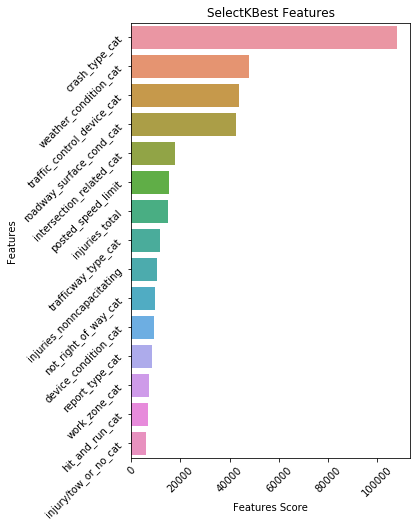

In [435]:
plot_features(top_12, "SelectKBest Features")

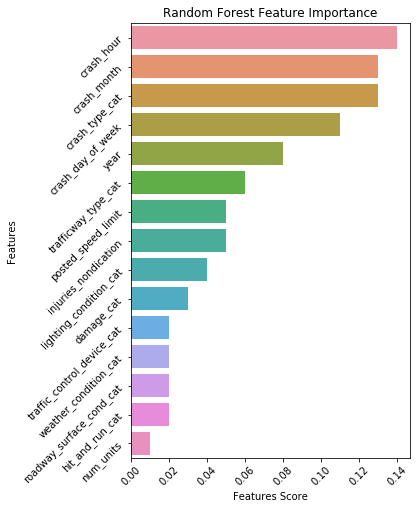

In [436]:
plot_features(top_feat_rf, "Random Forest Feature Importance")

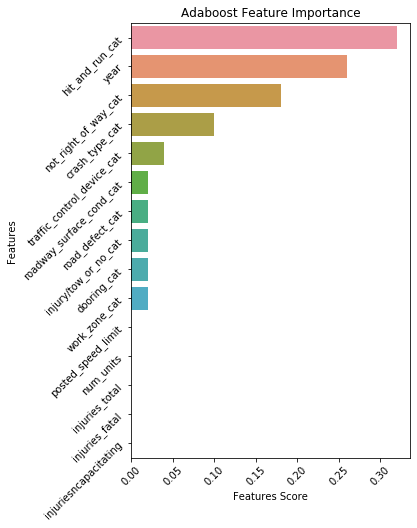

In [437]:
plot_features(top_feat_ada, "Adaboost Feature Importance")

In [438]:
all_top_feats = []

In [439]:
for lis in tops:
    for num in list(range(len(lis))):
        if list(lis.keys())[num] in all_top_feats:
            continue
        else:
            all_top_feats.append(list(lis.keys())[num])

## Model Perfecting (hyperparameter tuning needed to do in sections)

In [440]:
rf_clf = RandomForestClassifier()

In [441]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [442]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 5, 10, 15, 20],
#     'bootstrap' : [True, False],
#     'n_estimators': [5, 10, 15, 20, 50], 
#     'min_samples_leaf':  list(range(2,50,2)),
#     'min_samples_split': list(range(2,10,2)),

}

In [443]:

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(rf_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(x_train, y_train)

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [444]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 72.82%
Mean Test Score: 43.22%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini', 'max_depth': 10, 'max_features': 20}

In [238]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15, 20, 25, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': [10],
#     'bootstrap' : [True, False],
#     'n_estimators': [5, 10, 15, 20, 50], 
#     'min_samples_leaf':  list(range(2,50,2)),
#     'min_samples_split': list(range(2,10,2)),

}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(rf_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [239]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 97.94%
Mean Test Score: 36.56%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini', 'max_features': 10}

In [259]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': [10],
#     'bootstrap' : [True, False],
#     'n_estimators': [5, 10, 15, 20, 50], 
#     'min_samples_leaf':  list(range(2,50,2)),
#     'min_samples_split': list(range(2,10,2)),

}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(rf_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(x_train, y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [257]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 60.37%
Mean Test Score: 41.71%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini', 'max_depth': 10, 'max_features': 10}

In [446]:
dt_param_grid = {
    'criterion': ['gini'] ,
    'max_depth': [10],
# #    'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': [10],
##     'bootstrap' : [True, False],
# #    'n_estimators': [10, 30, 100], 
    'min_samples_leaf':  list(range(2,50,2)),
#     'min_samples_split': list(range(2,10,2)),
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(rf_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(x_train, y_train)

# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

Mean Training Score: 43.80%
Mean Test Score: 42.96%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 6}

In [447]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

In [451]:
list(top_12.keys())[:5], list(top_feat_rf.keys())[:6]

(['crash_type_cat',
  'weather_condition_cat',
  'traffic_control_device_cat',
  'roadway_surface_cond_cat',
  'intersection_related_cat'],
 ['crash_hour',
  'crash_month',
  'crash_type_cat',
  'crash_day_of_week',
  'year',
  'trafficway_type_cat'])

In [452]:
top_feats = ['crash_type',
  'weather_condition',
  'traffic_control_device',
  'roadway_surface_cond',
  'intersection_related',
 'crash_hour',
  'crash_month',
  'crash_day_of_week',
  'year',
  'trafficway_type']

In [453]:
df_best_feat = df[top_8]

In [454]:
df_bf_dum = pd.get_dummies(df_best_feat)

In [455]:
col_names = df_bf_dum.columns

features = df_bf_dum[col_names]


scaler = StandardScaler().fit(features.values)

features = scaler.transform(features.values)

scaled_features = pd.DataFrame(features, columns = col_names)

In [456]:
# Create X and y
y = df_target['target_names']
x = scaled_features

# Split data into training and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                    test_size = .30)


In [457]:
# Previous original class distribution

# Fit SMOTE to training data
x_train_resampled, y_train_resampled = SMOTE().fit_sample(x_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 



EXCEEDING SAFE SPEED FOR CONDITIONS                                                 24783
OBSTRUCTED CROSSWALKS                                                               24783
DISREGARDING YIELD SIGN                                                             24783
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 24783
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER    24783
DRIVING ON WRONG SIDE/WRONG WAY                                                     24783
DISTRACTION - FROM INSIDE VEHICLE                                                   24783
WEATHER                                                                             24783
DISREGARDING STOP SIGN                                                              24783
EQUIPMENT - VEHICLE CONDITION                                                       24783
FAILING TO REDUCE SPEED TO AVOID CRASH                                              24783
IMPROPER

In [461]:
rf_clf = RandomForestClassifier(
                                  criterion= 'gini',
#                                 max_depth= 50,
#                                 bootstrap=True,
                                class_weight='balanced', 
#                                 max_features='sqrt', 
#                                 max_leaf_nodes=20,
#                                 min_impurity_decrease=0.0, 
#                                 min_impurity_split=None,
                                min_samples_leaf=10, 
                                min_samples_split=20,
#                                 min_weight_fraction_leaf=0.0, 
#                                 n_estimators=10,
#                                 n_jobs=None, 
#                                 oob_score=False, 
#                                 random_state=None,
#                                 verbose=0, 
#                                 warm_start=False
                               )

In [462]:
rf_clf.fit(x_train_resampled, y_train_resampled)



/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [463]:

train_score = rf_clf.score(x_train, y_train)
test_score = rf_clf.score(x_test, y_test)
print(train_score, test_score)

0.3355276860364783 0.2811545404054429


In [464]:
import xgboost as xgb

In [ ]:
clf = xgb.XGBClassifier()
clf.fit(x_train_resampled, y_train_resampled)
training_preds = clf.predict(x_train_resampled)
val_preds = clf.predict(x_test)
training_accuracy = accuracy_score(y_train_resampled, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [386]:
ada_clf.fit(x_train_resampled, y_train_resampled)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [387]:

train_score = ada_clf.score(x_train, y_train)
test_score = ada_clf.score(x_test, y_test)
print(train_score, test_score)

0.09044616876818623 0.0906710205137324


In [ ]:
dt_param_grid = {
#     'criterion': ['gini'] ,
#     'max_depth': [10],
# #    'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': [10],
##     'bootstrap' : [True, False],
# #    'n_estimators': [10, 30, 100], 
    'min_samples_leaf':  list(range(2,50,2)),
#     'min_samples_split': list(range(2,10,2)),
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(rf_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(x_train, y_train)

# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [796]:
ytrain_pred = rf_clf.predict(x_train)

## Model Exploring